**KNN & PCA Assignment**






1. What is K-Nearest Neighbors (KNN) and how does it work?

Answer:
K-Nearest Neighbors (KNN) is a simple, non-parametric, supervised machine learning algorithm used for both classification and regression tasks. It works on the principle of similarity — a new data point is classified based on how its neighbors are classified.
Steps:

Choose the number of neighbors K.

Calculate the distance between the new data point and all points in the training dataset.

Select the K closest points.

Predict the label by majority vote (classification) or average (regression).

2. What is the difference between KNN Classification and KNN Regression?

Answer:

KNN Classification: Predicts a categorical class based on the majority label of its K nearest neighbors.

KNN Regression: Predicts a continuous value by averaging the target values of its K nearest neighbors.

3. What is the role of the distance metric in KNN?

Answer:
The distance metric determines how similarity between points is measured. It directly impacts which points are considered neighbors. Common distance metrics include:

Euclidean Distance: Most common, measures straight-line distance.

Manhattan Distance: Measures distance in grid-like paths.

Minkowski Distance: Generalized version of Euclidean and Manhattan.

4. What is the Curse of Dimensionality in KNN?

Answer:
The curse of dimensionality refers to problems that occur when data has many features. In high dimensions, data points become sparse, and distance measures lose meaning. As a result, KNN’s performance decreases because finding meaningful neighbors becomes difficult.

5. How can we choose the best value of K in KNN?

Answer:

Use cross-validation to evaluate model performance for different K values.

Odd values are preferred in binary classification to avoid ties.

Small K: May cause overfitting.

Large K: May cause underfitting.
A plot of model accuracy vs. K helps choose the optimal K.

6. What are KD Tree and Ball Tree in KNN?

Answer:

KD Tree: A data structure that partitions the feature space into hyperplanes to speed up nearest neighbor searches. Works well for low-dimensional data.

Ball Tree: A tree structure that partitions data into hyperspheres. It is more efficient for high-dimensional or non-uniform data.

7. When should you use KD Tree vs. Ball Tree?

Answer:

KD Tree: Best suited for datasets with fewer than 20 features (low-dimensional).

Ball Tree: Recommended for high-dimensional datasets or when data is not evenly distributed.

8. What are the disadvantages of KNN?

Answer:

Slow prediction: Needs to compute distance to all points.

High memory usage: Must store the entire dataset.

Sensitive to noise: Outliers can affect predictions.

Not suitable for high-dimensional data: Suffers from the curse of dimensionality.

9. How does feature scaling affect KNN?

Answer:
KNN is distance-based, so features with larger scales can dominate distance calculations. Scaling ensures all features contribute equally. Techniques like standardization or normalization improve model performance.

10. What is PCA (Principal Component Analysis)?

Answer:
PCA is a dimensionality reduction technique that transforms data into a new coordinate system where the greatest variance lies on the first principal component, the second greatest variance on the second component, and so on. It reduces the number of features while preserving most information.

11. How does PCA work?

Answer:

Standardize the dataset.

Compute the covariance matrix.

Calculate eigenvalues and eigenvectors.

Sort eigenvectors by decreasing eigenvalues.

Choose top k eigenvectors to form a new feature space.

Transform the data into this new space.

12. What is the geometric intuition behind PCA?

Answer:
PCA finds new axes (principal components) that capture the maximum variance in the data. Geometrically, it rotates and projects the data into a lower-dimensional space where the spread (variance) is largest.

13. What is the difference between Feature Selection and Feature Extraction?

Answer:

Feature Selection: Chooses a subset of existing features (e.g., removing irrelevant features).

Feature Extraction: Creates new features by transforming existing features (e.g., PCA).

14. What are Eigenvalues and Eigenvectors in PCA?

Answer:

Eigenvectors: Directions of the new feature space (principal components).

Eigenvalues: Magnitudes that indicate how much variance each principal component explains.
Higher eigenvalues mean more variance is captured along that component.

15. How do you decide the number of components to keep in PCA?

Answer:

Use explained variance ratio to retain components explaining ~90–95% variance.

Use a scree plot to find the “elbow point” where additional components add little variance.

16. Can PCA be used for classification?

Answer:
PCA itself does not classify data, but it can be used as a preprocessing step before classification to reduce dimensionality, improve speed, and reduce overfitting.

17. What are the limitations of PCA?

Answer:

Captures only linear relationships.

Reduces interpretability of features.

Sensitive to scaling of data.

Not ideal for categorical variables.

18. How do KNN and PCA complement each other?

Answer:
PCA reduces dimensionality and removes noise, which improves KNN’s speed and accuracy. By projecting data into fewer dimensions, PCA makes distance calculations more meaningful.

19. How does KNN handle missing values in a dataset?

Answer:
KNN cannot directly handle missing values. Common strategies:

Imputation: Replace missing values with the mean, median, or mode of K nearest neighbors.

Deletion: Remove rows with missing values (only if few).

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

| Feature   | PCA                      | LDA                         |
| --------- | ------------------------ | --------------------------- |
| Type      | Unsupervised             | Supervised                  |
| Objective | Maximize variance        | Maximize class separability |
| Uses      | Features only            | Features + labels           |
| Output    | Principal components     | Discriminant vectors        |
| Purpose   | Dimensionality reduction | Classification + reduction  |


In [1]:
# Q21: Train a KNN Classifier on the Iris dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris data
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
# Q22: Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic regression data
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.0356438100052021


In [11]:
# Q23: Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Iris dataset reload (taaki y discrete ho)
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for metric in ["euclidean", "manhattan"]:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy with {metric} distance:", accuracy_score(y_test, y_pred))


Accuracy with euclidean distance: 1.0
Accuracy with manhattan distance: 1.0


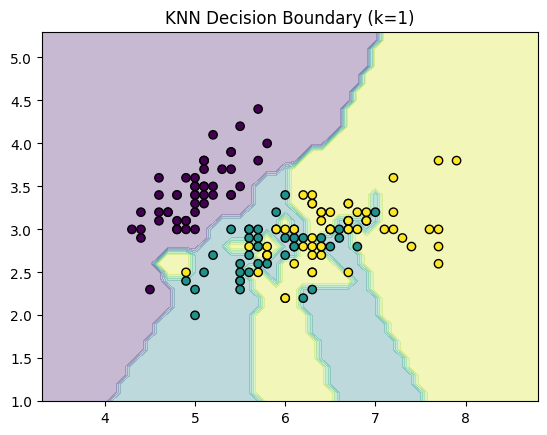

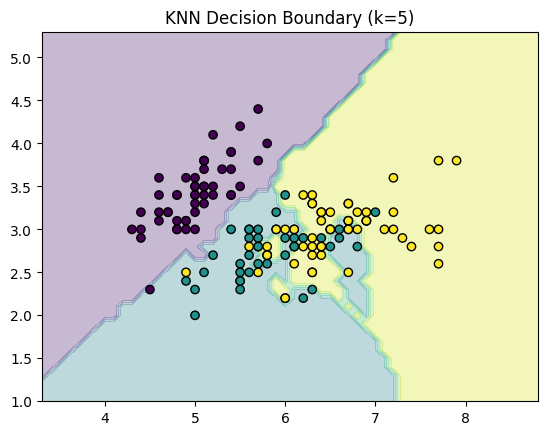

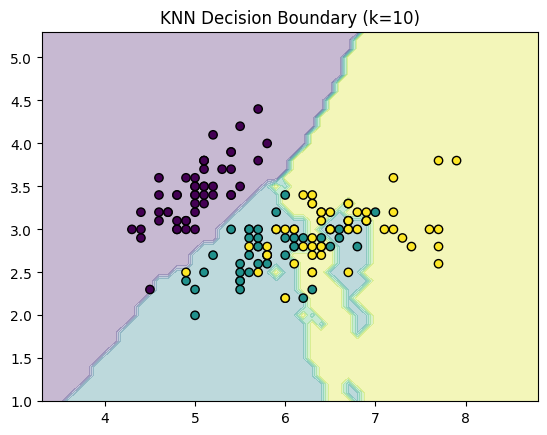

In [4]:
# Q24: Train a KNN Classifier with different values of K and visualize decision boundaries.

import matplotlib.pyplot as plt
import numpy as np

# Use only first two features for visualization
X_vis = iris.data[:, :2]
y_vis = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Plot decision boundary
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k')
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.show()


In [5]:
# Q25: Apply Feature Scaling before training a KNN model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
print("Accuracy without scaling:", accuracy_score(y_test, knn_unscaled.predict(X_test)))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
print("Accuracy with scaling:", accuracy_score(y_test, knn_scaled.predict(X_test_scaled)))


Accuracy without scaling: 0.8
Accuracy with scaling: 0.8333333333333334


In [6]:
# Q26: Train a PCA model on synthetic data and print the explained variance ratio for each component.

from sklearn.decomposition import PCA

# Create synthetic data
X_synthetic = np.random.rand(100, 5)

# Train PCA
pca = PCA(n_components=5)
pca.fit(X_synthetic)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.2594463  0.21647063 0.19482081 0.18827468 0.14098757]


In [7]:
# Q27: Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

# Without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
acc_no_pca = accuracy_score(y_test, knn_no_pca.predict(X_test_scaled))

# With PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA:", acc_pca)


Accuracy without PCA: 0.8333333333333334
Accuracy with PCA: 0.7666666666666667


In [8]:
# Q28: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy: 0.7416666666666667


In [9]:
# Q29: Train a KNN Classifier and check the number of misclassified samples.

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

misclassified = (y_test != y_pred).sum()
print("Number of misclassified samples:", misclassified)


Number of misclassified samples: 5


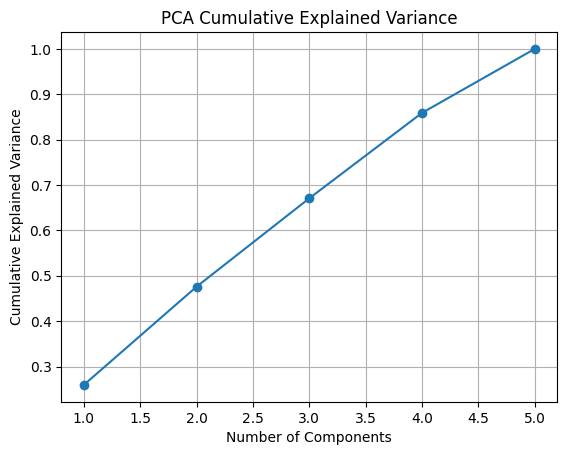

In [10]:
# Q30: Train a PCA model and visualize the cumulative explained variance.

import matplotlib.pyplot as plt

pca = PCA().fit(X_synthetic)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid()
plt.show()
